In [4]:
import joblib

import numpy as np

import pandas as pd

import plotly.graph_objects as go
import plotly.express as px

from scipy.stats import randint

import statsmodels.formula.api as smf #regresion lineal o logistica

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
df = pd.read_excel('Madrid_dataset (1).xlsx')
df.head()

,ASSETID,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,CONSTRUCTION_YEAR,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO
0,A15019136831406238029,126000,47.0,1,1.0,0,1.0,1.0,1.0,1.0,1.0,0.0,2005.0,8.058429,0.872075
1,A6677225905472065344,235000,54.0,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,0.876369,0.116382
2,A13341979748618524775,373000,75.0,2,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1915.0,0.907479,0.139109
3,A4775182175615276542,284000,48.0,1,1.0,0,1.0,1.0,0.0,0.0,0.0,0.0,1947.0,0.845462,0.144299
4,A2492087730711701973,228000,50.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1930.0,1.250231,0.337098


In [8]:
df.info() #información datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94815 entries, 0 to 94814
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ASSETID                  94815 non-null  object 
 1   PRICE                    94815 non-null  int64  
 2   CONSTRUCTEDAREA          94814 non-null  float64
 3   ROOMNUMBER               94815 non-null  int64  
 4   BATHNUMBER               94813 non-null  float64
 5   HASTERRACE               94815 non-null  int64  
 6   HASLIFT                  94812 non-null  float64
 7   HASAIRCONDITIONING       94814 non-null  float64
 8   HASSWIMMINGPOOL          94812 non-null  float64
 9   HASDOORMAN               94813 non-null  float64
 10  HASGARDEN                94814 non-null  float64
 11  ISDUPLEX                 94814 non-null  float64
 12  CONSTRUCTION_YEAR        94814 non-null  float64
 13  DISTANCE_TO_CITY_CENTER  94814 non-null  float64
 14  DISTANCE_TO_METRO     

In [10]:
df['CONSTRUCTION_YEAR'] = df['CONSTRUCTION_YEAR'].astype('Int64') # PARA PASARLO A ENTERO
df['BATHNUMBER'] = df['BATHNUMBER'].astype('Int64')
df['HASLIFT'] = df['HASLIFT'].astype('Int64')
df['HASTERRACE'] = df['HASTERRACE'].astype('Int64')
df['HASAIRCONDITIONING'] = df['HASAIRCONDITIONING'].astype('Int64')
df['HASSWIMMINGPOOL'] = df['HASSWIMMINGPOOL'].astype('Int64')
df['HASDOORMAN'] = df['HASDOORMAN'].astype('Int64')
df['HASGARDEN'] = df['HASGARDEN'].astype('Int64')
df['ISDUPLEX'] = df['ISDUPLEX'].astype('Int64')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94815 entries, 0 to 94814
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ASSETID                  94815 non-null  object 
 1   PRICE                    94815 non-null  int64  
 2   CONSTRUCTEDAREA          94814 non-null  float64
 3   ROOMNUMBER               94815 non-null  int64  
 4   BATHNUMBER               94813 non-null  Int64  
 5   HASTERRACE               94815 non-null  Int64  
 6   HASLIFT                  94812 non-null  Int64  
 7   HASAIRCONDITIONING       94814 non-null  Int64  
 8   HASSWIMMINGPOOL          94812 non-null  Int64  
 9   HASDOORMAN               94813 non-null  Int64  
 10  HASGARDEN                94814 non-null  Int64  
 11  ISDUPLEX                 94814 non-null  Int64  
 12  CONSTRUCTION_YEAR        94814 non-null  Int64  
 13  DISTANCE_TO_CITY_CENTER  94814 non-null  float64
 14  DISTANCE_TO_METRO     

In [14]:
df.isnull().sum() #valores nulos

ASSETID                    0
PRICE                      0
CONSTRUCTEDAREA            1
ROOMNUMBER                 0
BATHNUMBER                 2
HASTERRACE                 0
HASLIFT                    3
HASAIRCONDITIONING         1
HASSWIMMINGPOOL            3
HASDOORMAN                 2
HASGARDEN                  1
ISDUPLEX                   1
CONSTRUCTION_YEAR          1
DISTANCE_TO_CITY_CENTER    1
DISTANCE_TO_METRO          1
dtype: int64

In [16]:
df = df.dropna() #quitar los nulos

In [18]:
df.isnull().sum() #nulos eliminados

ASSETID                    0
PRICE                      0
CONSTRUCTEDAREA            0
ROOMNUMBER                 0
BATHNUMBER                 0
HASTERRACE                 0
HASLIFT                    0
HASAIRCONDITIONING         0
HASSWIMMINGPOOL            0
HASDOORMAN                 0
HASGARDEN                  0
ISDUPLEX                   0
CONSTRUCTION_YEAR          0
DISTANCE_TO_CITY_CENTER    0
DISTANCE_TO_METRO          0
dtype: int64

In [20]:
df.duplicated().sum()

0

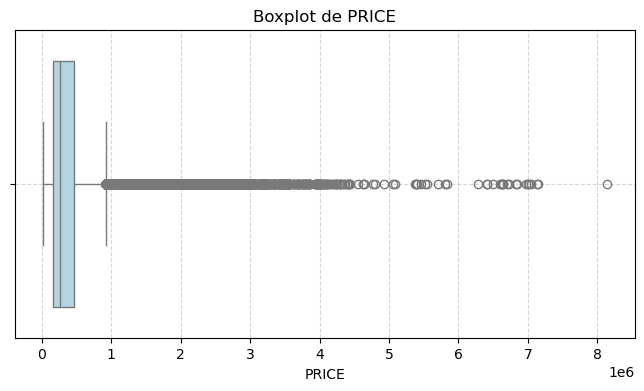

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x='PRICE', data=df, color='#ADD8E6')  # Azul claro
plt.title('Boxplot de PRICE')
plt.xlabel('PRICE')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


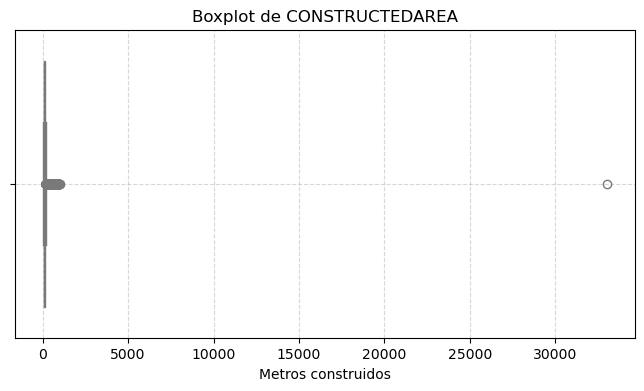

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x='CONSTRUCTEDAREA', data=df, color='#ADD8E6')  # Azul claro
plt.title('Boxplot de CONSTRUCTEDAREA')
plt.xlabel('Metros construidos')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


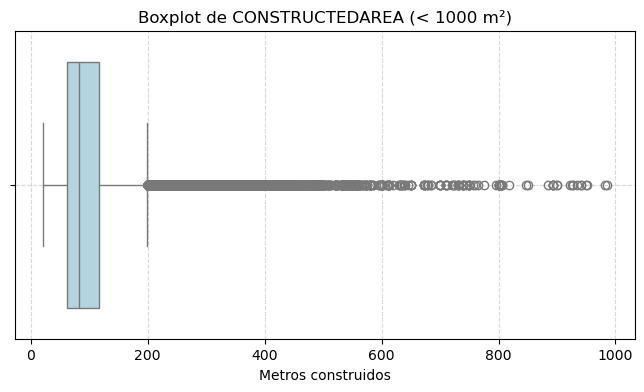

In [26]:
df_plot = df[df['CONSTRUCTEDAREA'] < 1000]  

plt.figure(figsize=(8, 4))
sns.boxplot(x='CONSTRUCTEDAREA', data=df_plot, color='#ADD8E6')
plt.title('Boxplot de CONSTRUCTEDAREA (< 1000 m²)')
plt.xlabel('Metros construidos')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


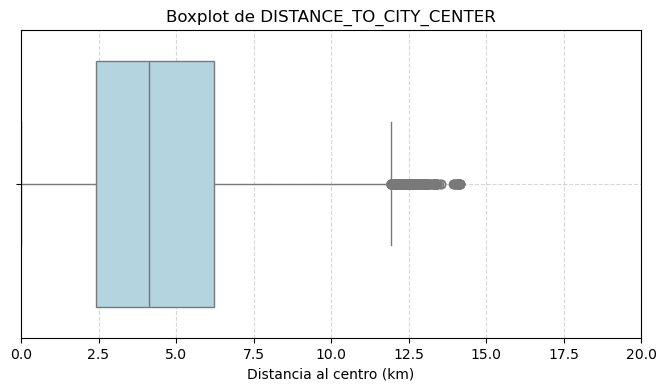

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x='DISTANCE_TO_CITY_CENTER', data=df, color='#ADD8E6')
plt.xlim(0, 20)  # limite de 20kms
plt.title('Boxplot de DISTANCE_TO_CITY_CENTER')
plt.xlabel('Distancia al centro (km)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


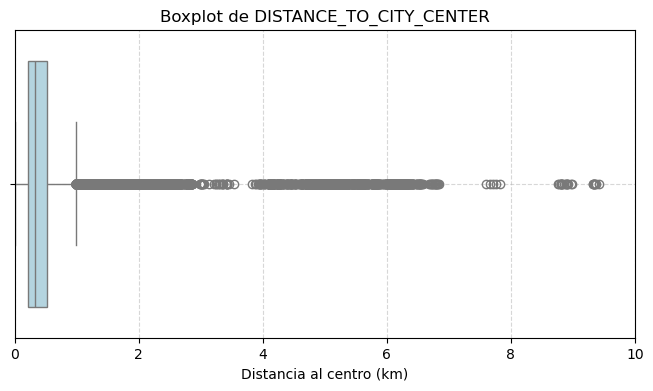

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x='DISTANCE_TO_METRO', data=df, color='#ADD8E6')
plt.xlim(0, 10)  # límite de 10kms
plt.title('Boxplot de DISTANCE_TO_CITY_CENTER')
plt.xlabel('Distancia al centro (km)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


- **LIMPIEZA DE DATOS**-

In [32]:
import pandas as pd

# Guardamos el número de filas inicial
filas_antes = len(df)

# Función para quitar outliers usando el método IQR
def quitar_outliers_iqr(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

# Lista de variables numéricas continuas
columnas_continuas = ['PRICE', 'CONSTRUCTEDAREA', 'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO']

# Aplicamos limpieza a cada variable de la lista
for col in columnas_continuas:
    df = quitar_outliers_iqr(df, col)

# Mostramos cuántas filas se eliminaron
filas_despues = len(df)
print(f"Filas eliminadas por outliers: {filas_antes - filas_despues}")
print(f"Filas restantes: {filas_despues}")


Filas eliminadas por outliers: 15969
Filas restantes: 78829


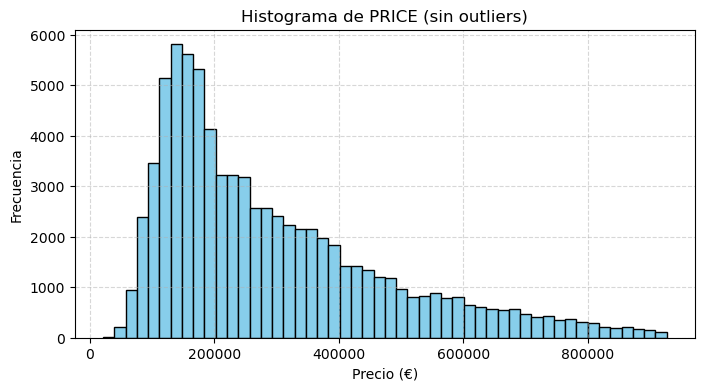

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df['PRICE'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de PRICE (sin outliers)')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


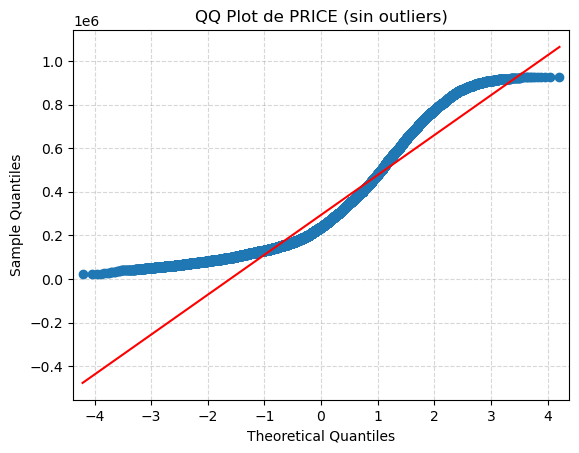

In [36]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df['PRICE'], line='s')
plt.title('QQ Plot de PRICE (sin outliers)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [38]:
# Cálculo de estadísticas para PRICE
col = 'PRICE'

min_val = df[col].min()
q1 = df[col].quantile(0.25)
mediana = df[col].median()
media = df[col].mean()
q3 = df[col].quantile(0.75)
max_val = df[col].max()
std = df[col].std()

# Mostrar resultados
print(f"\n Estadísticas de la variable '{col}':\n")
print(f"Min: {min_val:,.2f} €")
print(f"Q1: {q1:,.2f} €")
print(f"Mediana: {mediana:,.2f} €")
print(f"Media: {media:,.2f} €")
print(f"Q3: {q3:,.2f} €")
print(f"Max: {max_val:,.2f} €")
print(f"Desviación típica (std): {std:,.2f} €")





 Estadísticas de la variable 'PRICE':

Min: 21,000.00 €
Q1: 153,000.00 €
Mediana: 238,000.00 €
Media: 293,718.90 €
Q3: 387,000.00 €
Max: 927,000.00 €
Desviación típica (std): 183,004.50 €


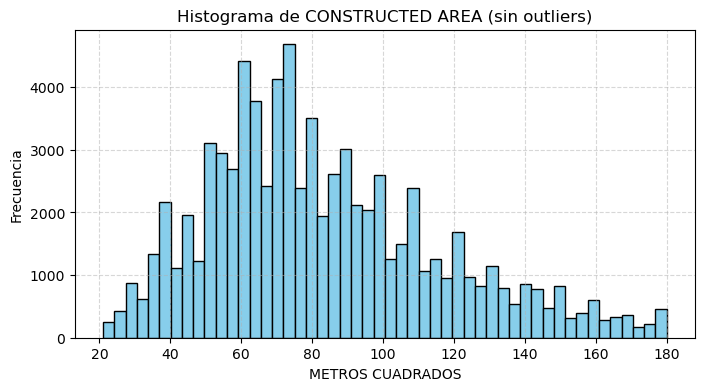

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df['CONSTRUCTEDAREA'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de CONSTRUCTED AREA (sin outliers)')
plt.xlabel('METROS CUADRADOS')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [42]:
# Cálculo de estadísticas para CONSTRUCTED AREA
col = 'CONSTRUCTEDAREA'

min_val = df[col].min()
q1 = df[col].quantile(0.25)
mediana = df[col].median()
media = df[col].mean()
q3 = df[col].quantile(0.75)
max_val = df[col].max()
std = df[col].std()

# Mostrar resultados 
print(f"\n Estadísticas de la variable '{col}':\n")
print(f"Min: {min_val:,.2f} ")
print(f"Q1: {q1:,.2f} ")
print(f"Mediana: {mediana:,.2f} ")
print(f"Media: {media:,.2f} ")
print(f"Q3: {q3:,.2f} ")
print(f"Max: {max_val:,.2f} ")
print(f"Desviación típica (std): {std:,.2f} ")



 Estadísticas de la variable 'CONSTRUCTEDAREA':

Min: 21.00 
Q1: 60.00 
Mediana: 77.00 
Media: 83.26 
Q3: 102.00 
Max: 180.00 
Desviación típica (std): 32.79 


In [44]:
# Cálculo de estadísticas para ROOM NUMBER
col = 'ROOMNUMBER'

min_val = df[col].min()
q1 = df[col].quantile(0.25)
mediana = df[col].median()
media = df[col].mean()
q3 = df[col].quantile(0.75)
max_val = df[col].max()

# Mostrar resultados 
print(f"\n Estadísticas de la variable '{col}':\n")
print(f"Min: {min_val:,.2f} ")
print(f"Q1: {q1:,.2f} ")
print(f"Mediana: {mediana:,.2f} ")
print(f"Media: {media:,.2f} ")
print(f"Q3: {q3:,.2f} ")
print(f"Max: {max_val:,.2f} ")



 Estadísticas de la variable 'ROOMNUMBER':

Min: 0.00 
Q1: 2.00 
Mediana: 2.00 
Media: 2.38 
Q3: 3.00 
Max: 93.00 


In [46]:
# Cálculo de estadísticas para BATH NUMBER
col = 'BATHNUMBER'

min_val = df[col].min()
q1 = df[col].quantile(0.25)
mediana = df[col].median()
media = df[col].mean()
q3 = df[col].quantile(0.75)
max_val = df[col].max()

# Mostrar resultados
print(f"\n Estadísticas de la variable '{col}':\n")
print(f"Min: {min_val:,.2f} ")
print(f"Q1: {q1:,.2f} ")
print(f"Mediana: {mediana:,.2f} ")
print(f"Media: {media:,.2f} ")
print(f"Q3: {q3:,.2f} ")
print(f"Max: {max_val:,.2f} ")



 Estadísticas de la variable 'BATHNUMBER':

Min: 0.00 
Q1: 1.00 
Mediana: 1.00 
Media: 1.39 
Q3: 2.00 
Max: 8.00 


In [48]:
# Cálculo de estadísticas para CONSTRUCTION YEAR
col = 'CONSTRUCTION_YEAR'

min_val = df[col].min()
q1 = df[col].quantile(0.25)
mediana = df[col].median()
media = df[col].mean()
q3 = df[col].quantile(0.75)
max_val = df[col].max()

# Mostrar resultados
print(f"\n Estadísticas de la variable '{col}':\n")
print(f"Min: {min_val:,.2f} ")
print(f"Q1: {q1:,.2f} ")
print(f"Mediana: {mediana:,.2f} ")
print(f"Media: {media:,.2f} ")
print(f"Q3: {q3:,.2f} ")
print(f"Max: {max_val:,.2f} ")


 Estadísticas de la variable 'CONSTRUCTION_YEAR':

Min: 1,627.00 
Q1: 1,954.00 
Mediana: 1,966.00 
Media: 1,964.12 
Q3: 1,980.00 
Max: 2,018.00 


In [50]:
# Aplicamos el filtro base de a partir qué año queremos el estudio
df = df[df['CONSTRUCTION_YEAR'] >= 1850]


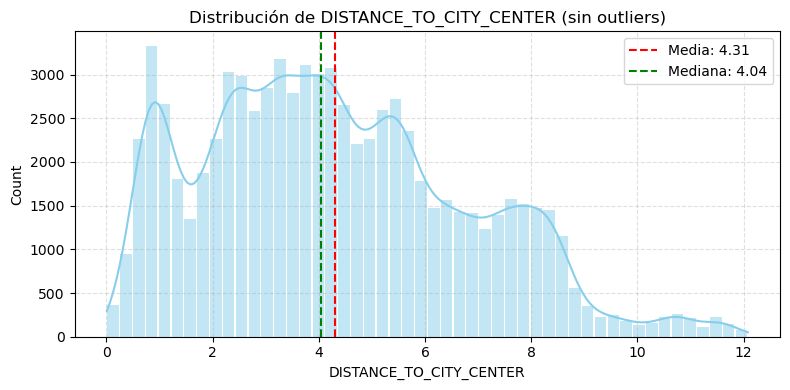

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular media y mediana
col = 'DISTANCE_TO_CITY_CENTER'
media = df[col].mean()
mediana = df[col].median()

# Histograma con barras separadas
plt.figure(figsize=(8, 4))
sns.histplot(df[col], bins=50, kde=True, color='skyblue', edgecolor=None, shrink=0.9)

# Líneas verticales de media y mediana
plt.axvline(media, color='red', linestyle='--', label=f"Media: {media:.2f}")
plt.axvline(mediana, color='green', linestyle='--', label=f"Mediana: {mediana:.2f}")

plt.title(f'Distribución de {col} (sin outliers)')
plt.xlabel(col)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [54]:
# Cálculo de estadísticas para DISTANCE TO CITY CENTER
col = 'DISTANCE_TO_CITY_CENTER'

min_val = df[col].min()
q1 = df[col].quantile(0.25)
mediana = df[col].median()
media = df[col].mean()
q3 = df[col].quantile(0.75)
max_val = df[col].max()
std = df[col].std()

# Mostrar resultados formateados
print(f"\n Estadísticas de la variable '{col}':\n")
print(f"Min: {min_val:,.2f} ")
print(f"Q1: {q1:,.2f} ")
print(f"Mediana: {mediana:,.2f} ")
print(f"Media: {media:,.2f} ")
print(f"Q3: {q3:,.2f} ")
print(f"Max: {max_val:,.2f} ")
print(f"Desviación típica (std): {std:,.2f} ")



 Estadísticas de la variable 'DISTANCE_TO_CITY_CENTER':

Min: 0.01 
Q1: 2.41 
Mediana: 4.04 
Media: 4.31 
Q3: 5.92 
Max: 12.08 
Desviación típica (std): 2.47 


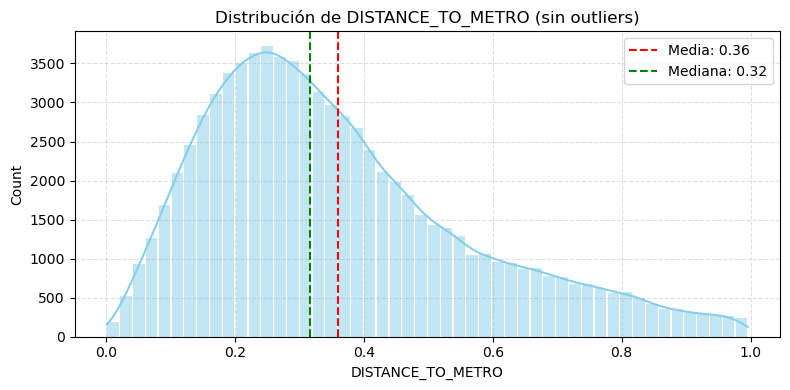

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular media y mediana
col = 'DISTANCE_TO_METRO'
media = df[col].mean()
mediana = df[col].median()

# Histograma con barras separadas
plt.figure(figsize=(8, 4))
sns.histplot(df[col], bins=50, kde=True, color='skyblue', edgecolor=None, shrink=0.9)

# Líneas verticales de media y mediana
plt.axvline(media, color='red', linestyle='--', label=f"Media: {media:.2f}")
plt.axvline(mediana, color='green', linestyle='--', label=f"Mediana: {mediana:.2f}")

plt.title(f'Distribución de {col} (sin outliers)')
plt.xlabel(col)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [58]:
# Cálculo de estadísticas para DISTANCE TO METRO
col = 'DISTANCE_TO_METRO'

min_val = df[col].min()
q1 = df[col].quantile(0.25)
mediana = df[col].median()
media = df[col].mean()
q3 = df[col].quantile(0.75)
max_val = df[col].max()
std = df[col].std()

# Mostrar resultadoS
print(f"\n Estadísticas de la variable '{col}':\n")
print(f"Min: {min_val:,.2f} ")
print(f"Q1: {q1:,.2f} ")
print(f"Mediana: {mediana:,.2f} ")
print(f"Media: {media:,.2f} ")
print(f"Q3: {q3:,.2f} ")
print(f"Max: {max_val:,.2f} ")
print(f"Desviación típica (std): {std:,.2f} ")



 Estadísticas de la variable 'DISTANCE_TO_METRO':

Min: 0.00 
Q1: 0.21 
Mediana: 0.32 
Media: 0.36 
Q3: 0.47 
Max: 1.00 
Desviación típica (std): 0.21 


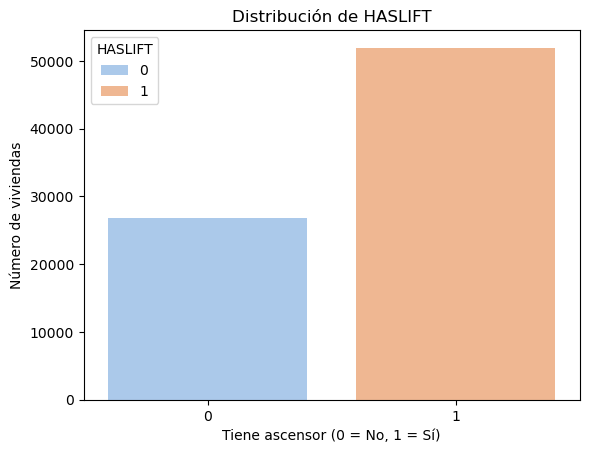

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='HASLIFT', hue='HASLIFT', palette='pastel')
plt.title('Distribución de HASLIFT')
plt.xlabel('Tiene ascensor (0 = No, 1 = Sí)')
plt.ylabel('Número de viviendas')
plt.show()


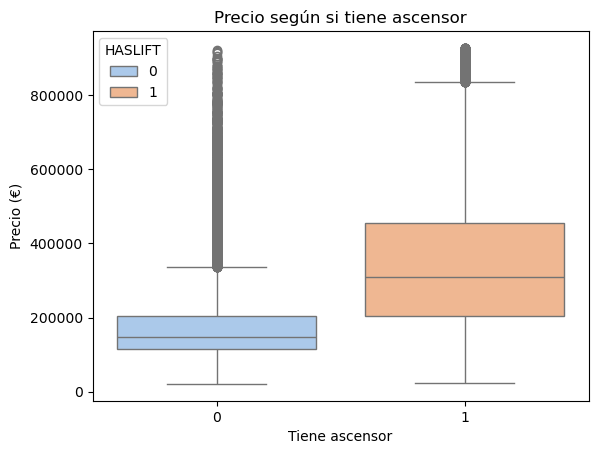

In [62]:
sns.boxplot(data=df, x='HASLIFT',hue='HASLIFT', y='PRICE', palette='pastel')
plt.title('Precio según si tiene ascensor')
plt.xlabel('Tiene ascensor')
plt.ylabel('Precio (€)')
plt.show()


- ELIMINO LOS QUE NO TENGAN BAÑOS
- MIRAR LOS ATIPICOS DE CADA TABLA Y ELIMINARLOS

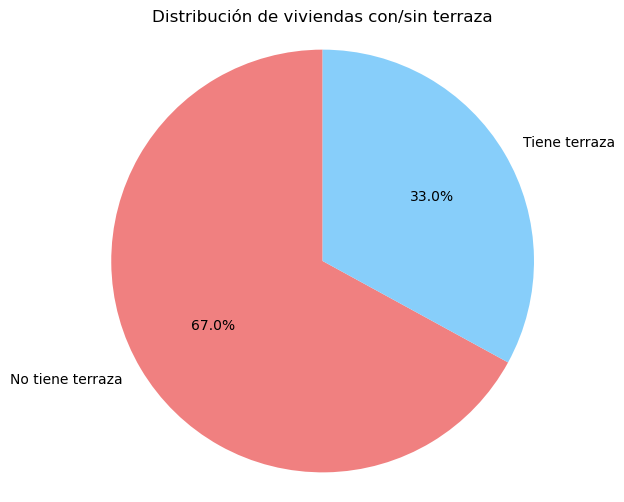

In [64]:
import matplotlib.pyplot as plt

# Conteo y etiquetas
valores = df['HASTERRACE'].value_counts()
etiquetas = ['No tiene terraza', 'Tiene terraza'] if 1 in valores.index else ['Tiene terraza', 'No tiene terraza']

# Colores 
colores = ['lightcoral', 'lightskyblue']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Distribución de viviendas con/sin terraza')
plt.axis('equal')  # para que sea un círculo
plt.show()


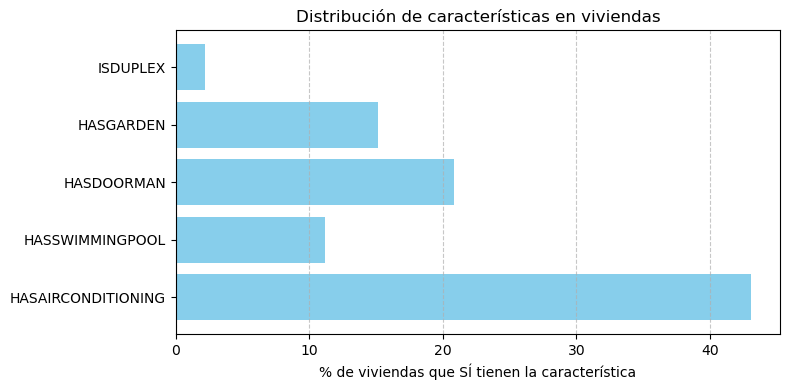

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de variables binarias
variables = ['HASAIRCONDITIONING', 'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX']

# Lista para guardar los resultados
datos = []

# Calcular porcentajes
for col in variables:
    porcentaje = df[col].mean() * 100
    datos.append({'Variable': col, 'Con (%)': round(porcentaje, 2)})

# Creación DataFrame
tabla = pd.DataFrame(datos)

# Graficar
plt.figure(figsize=(8, 4))
plt.barh(tabla['Variable'], tabla['Con (%)'], color='skyblue')
plt.xlabel('% de viviendas que SÍ tienen la característica')
plt.title('Distribución de características en viviendas')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


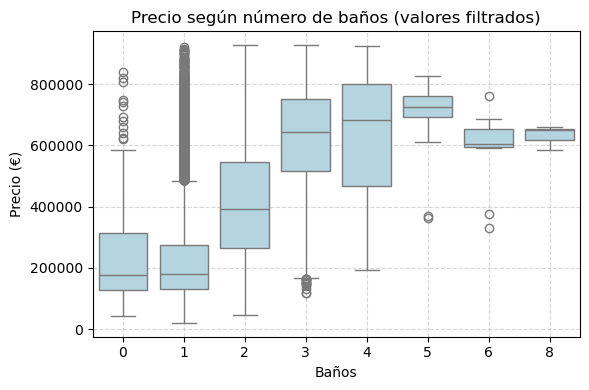

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='BATHNUMBER', y='PRICE', data=df, color='#ADD8E6')  # Color uniforme
plt.title('Precio según número de baños (valores filtrados)')
plt.xlabel('Baños')
plt.ylabel('Precio (€)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [70]:
# Filtramos valores razonables de baños (del 1 al 4)
df = df[(df['BATHNUMBER'] >= 1) & (df['BATHNUMBER'] <= 4)]


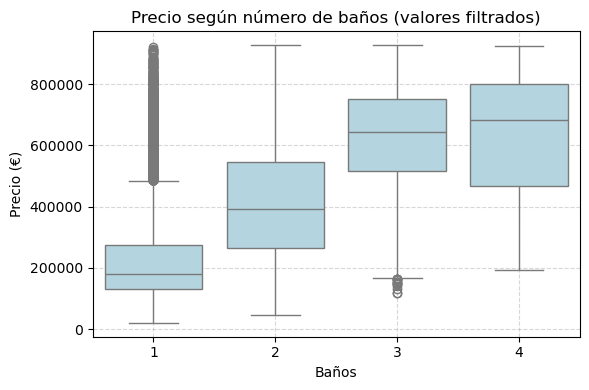

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='BATHNUMBER', y='PRICE', data=df, color='#ADD8E6')  
plt.title('Precio según número de baños (valores filtrados)')
plt.xlabel('Baños')
plt.ylabel('Precio (€)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


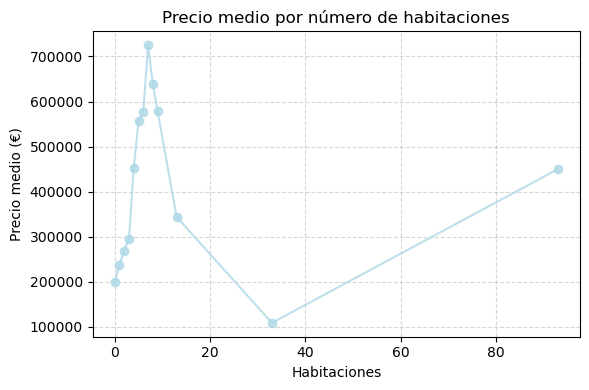

In [76]:
import matplotlib.pyplot as plt

# Agrupamos por número de habitaciones y calcular precio medio
media_room = df.groupby('ROOMNUMBER')['PRICE'].mean().sort_index()

# Gráfico
plt.figure(figsize=(6, 4))
plt.plot(media_room.index, media_room.values, marker='o', color='#ADD8E6', alpha=0.8)
plt.title('Precio medio por número de habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio medio (€)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [78]:
# Filtrar valores razonables de habitaciones (1 al 6)
df = df[(df['ROOMNUMBER'] >= 0) & (df['ROOMNUMBER'] <= 6)]


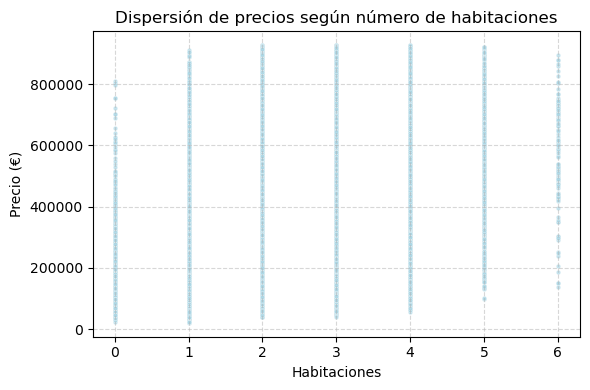

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo viviendas con hasta 6 habitaciones
df_filtrado = df[df['ROOMNUMBER'] <= 6]

# Scatterplot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_filtrado, x='ROOMNUMBER', y='PRICE',
                color='#ADD8E6', alpha=0.7, s=10)

plt.title('Dispersión de precios según número de habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio (€)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [82]:
filas, columnas = df.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")


El DataFrame tiene 78618 filas y 15 columnas.


***ANALISIS MULTIVARIANTE***

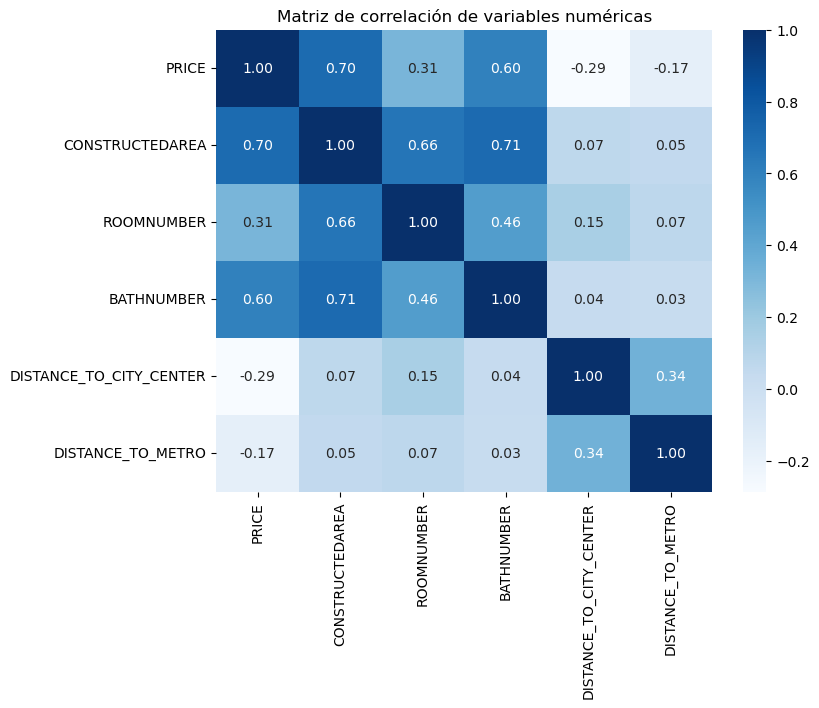

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de variables numéricas relevantes
variables_corr = ['PRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
                  'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO']

# Matriz de correlación
corr = df[variables_corr].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de correlación de variables numéricas')
plt.show()


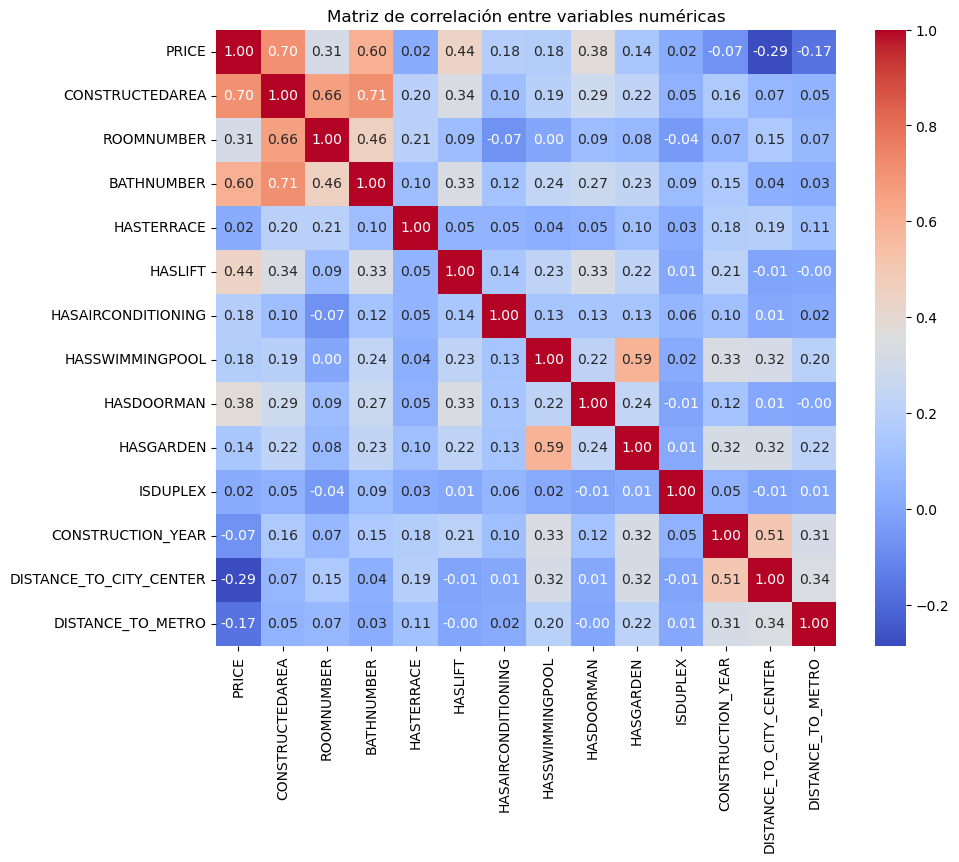

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


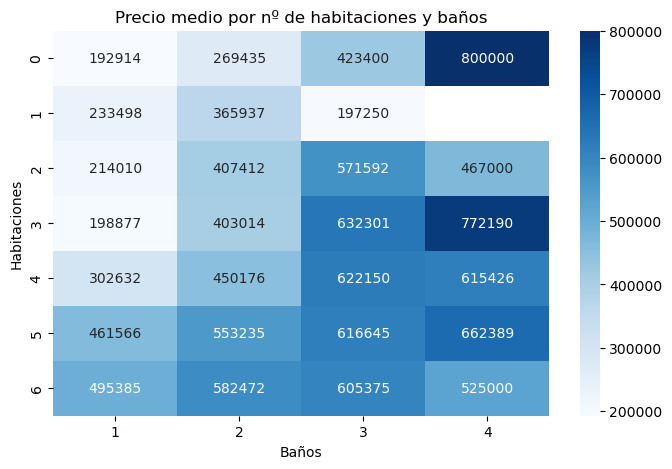

In [88]:
pivot = df.pivot_table(values='PRICE', index='ROOMNUMBER', columns='BATHNUMBER', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Precio medio por nº de habitaciones y baños')
plt.xlabel('Baños')
plt.ylabel('Habitaciones')
plt.show()


# **MODELOS**

In [90]:
from sklearn.model_selection import train_test_split

# Separación de variables
y = df['PRICE']
X = df.drop(['PRICE', 'ASSETID'], axis=1)  # Elimina target e ID

# División entre train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verificación de formas
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (62894, 13)
X_test: (15724, 13)
y_train: (62894,)
y_test: (15724,)


# **REGRESION LINEAL**

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test_scaled)

In [94]:
# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

MAE: 72432.24
RMSE: 96972.32
R²: 0.716


In [96]:
# 1. Transformar el target y definir variables con lOG
y_log = np.log(df['PRICE'])
X_log = df.drop(['PRICE', 'ASSETID'], axis=1)

# 2. División entre train y test
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

# 3. Escalamos las variables
scaler_log = StandardScaler()
X_train_log_scaled = scaler_log.fit_transform(X_train_log)
X_test_log_scaled = scaler_log.transform(X_test_log)

# 4. Entrenar el modelo
model_log = LinearRegression()
model_log.fit(X_train_log_scaled, y_train_log)

# 5. Predicción (log)
y_pred_log = model_log.predict(X_test_log_scaled)

# 6. Volver a escala real (€)
y_test_real = np.exp(y_test_log)
y_pred_real = np.exp(y_pred_log)

# 7. Evaluación en escala real
mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r2 = r2_score(y_test_real, y_pred_real)

print(f"MAE: {mae:.2f} ")
print(f"RMSE: {rmse:.2f} ")
print(f"R²: {r2:.3f}")



MAE: 71736.28 
RMSE: 197343.25 
R²: -0.176


# **RANDOM FOREST**

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Creación del modelo
rf_model = RandomForestRegressor(
    n_estimators=100,     # número de árboles
    max_depth=None,       # profundidad (None = crecer hasta pureza)
    random_state=42,
    n_jobs=-1             # usa todos los núcleos para acelerar
)

# 2. Entrenar
rf_model.fit(X_train, y_train)

# 3. Predecir
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluación
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae:.2f} €")
print(f"RMSE: {rmse:.2f} €")
print(f"R²: {r2:.3f}")


MAE: 43855.73 €
RMSE: 67845.05 €
R²: 0.861


In [241]:
import pandas as pd

importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print(importancias)


                   Variable  Importancia
0           CONSTRUCTEDAREA     0.539563
11  DISTANCE_TO_CITY_CENTER     0.184740
4                   HASLIFT     0.078975
12        DISTANCE_TO_METRO     0.061379
10        CONSTRUCTION_YEAR     0.054734
2                BATHNUMBER     0.017948
1                ROOMNUMBER     0.017470
7                HASDOORMAN     0.012789
6           HASSWIMMINGPOOL     0.011937
5        HASAIRCONDITIONING     0.009291
3                HASTERRACE     0.005870
8                 HASGARDEN     0.003301
9                  ISDUPLEX     0.002003


In [243]:
# 1. Seleccionamos las columnas más importantes
important_features = [
    'CONSTRUCTEDAREA',
    'DISTANCE_TO_CITY_CENTER',
    'HASLIFT',
    'DISTANCE_TO_METRO',
    'CONSTRUCTION_YEAR',
    'BATHNUMBER'
]

X_reduced = df[important_features]
y = df['PRICE']

# 2. Dividir entre train y test
from sklearn.model_selection import train_test_split
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# 3. Entrenar Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reduced.fit(X_train_red, y_train_red)

# 4. Predecir y evaluar
y_pred_red = rf_reduced.predict(X_test_red)

mae = mean_absolute_error(y_test_red, y_pred_red)
rmse = np.sqrt(mean_squared_error(y_test_red, y_pred_red))
r2 = r2_score(y_test_red, y_pred_red)

print(f"MAE (modelo reducido): {mae:.2f} €")
print(f"RMSE (modelo reducido): {rmse:.2f} €")
print(f"R² (modelo reducido): {r2:.3f}")


MAE (modelo reducido): 47377.40 €
RMSE (modelo reducido): 72602.23 €
R² (modelo reducido): 0.841


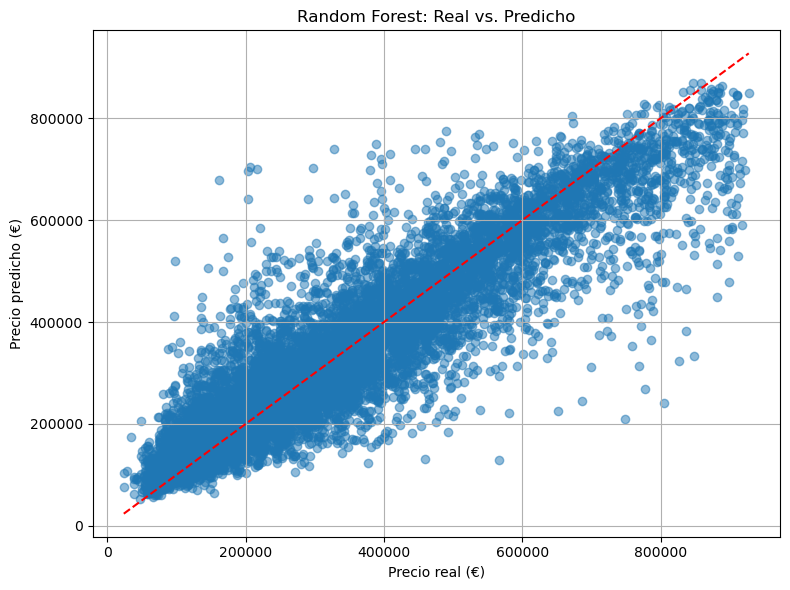

In [245]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio real (€)")
plt.ylabel("Precio predicho (€)")
plt.title("Random Forest: Real vs. Predicho")
plt.grid(True)
plt.tight_layout()
plt.show()


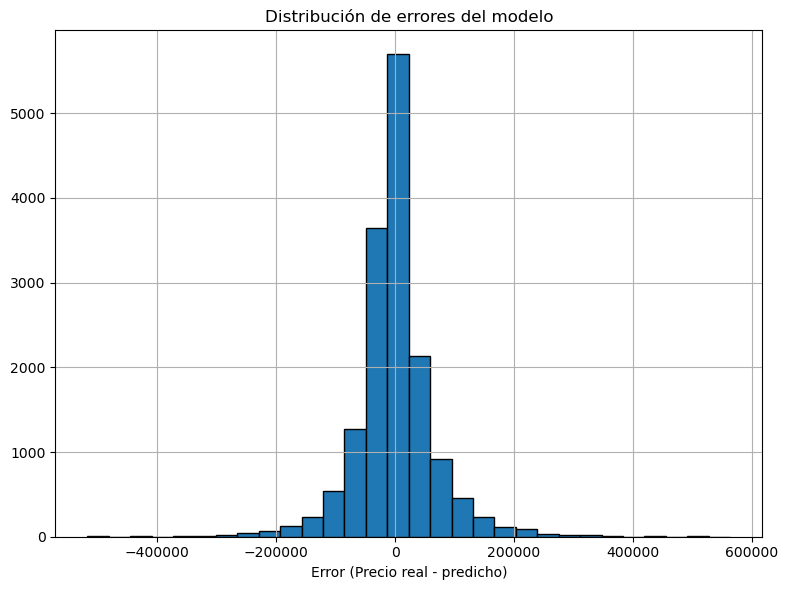

In [247]:
errores = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
plt.hist(errores, bins=30, edgecolor='black')
plt.xlabel("Error (Precio real - predicho)")
plt.title("Distribución de errores del modelo")
plt.grid(True)
plt.tight_layout()
plt.show()


In [251]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Crear el modelo base
rf = RandomForestRegressor(random_state=42)

# Búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Evaluar
y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("Mejores hiperparámetros:", grid_search.best_params_)
print(f"MAE: {mae:.2f} €")
print(f"RMSE: {rmse:.2f} €")
print(f"R²: {r2:.3f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
71 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 43891.42 €
RMSE: 67075.10 €
R²: 0.864


In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Selección de variables y target
X = df.drop(['PRICE', 'ASSETID'], axis=1)
y = df['PRICE']

# 2. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Entrenar Random Forest con hiperparámetros óptimos
best_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)

# 4. Predicción
y_pred = best_rf.predict(X_test)

# 5. Evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Random Forest Final ===")
print(f"MAE: {mae:.2f} €")
print(f"RMSE: {rmse:.2f} €")
print(f"R²: {r2:.3f}")


=== Random Forest Final ===
MAE: 43891.42 €
RMSE: 67075.10 €
R²: 0.864


# **XGBOOST**

In [257]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [259]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Preparamos datos
X = df.drop(['PRICE', 'ASSETID'], axis=1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Crear y entrenar el modelo
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=1,
    colsample_bytree=1,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# 3. Predecir
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluación
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("=== XGBoost ===")
print(f"MAE: {mae:.2f} €")
print(f"RMSE: {rmse:.2f} €")
print(f"R²: {r2:.3f}")


=== XGBoost ===
MAE: 54964.03 €
RMSE: 77487.17 €
R²: 0.819


In [261]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Definir el modelo base
xgb_base = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# 2. Definir el espacio de búsqueda
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# 3. Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_distributions,
    n_iter=20,               # número de combinaciones aleatorias a probar
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 4. Ejecutar búsqueda
random_search.fit(X_train, y_train)

# 5. Mejor modelo
best_xgb = random_search.best_estimator_

# 6. Predicción y evaluación
y_pred_xgb = best_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("=== XGBoost Optimizado ===")
print("Mejores hiperparámetros:", random_search.best_params_)
print(f"MAE: {mae:.2f} €")
print(f"RMSE: {rmse:.2f} €")
print(f"R²: {r2:.3f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
=== XGBoost Optimizado ===
Mejores hiperparámetros: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
MAE: 46273.25 €
RMSE: 68438.37 €
R²: 0.859


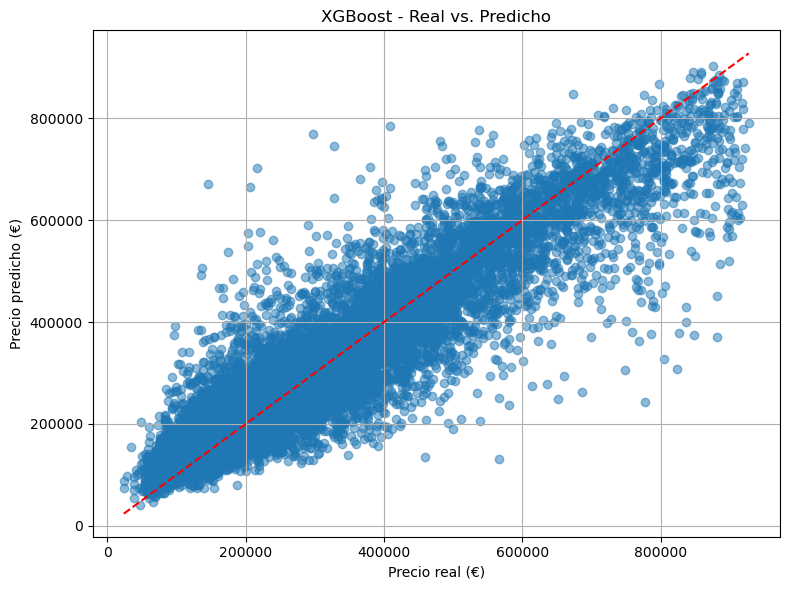

In [263]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio real (€)")
plt.ylabel("Precio predicho (€)")
plt.title("XGBoost - Real vs. Predicho")
plt.grid(True)
plt.tight_layout()
plt.show()
